# Assignment 1

Explore solutions of linear regression model with MSE loss.  
Investigate how regularization affects the solution.  
In this toy example we use simulated data and select $|| \hat w - w||_2$ as quality metric (distance between found solution and the ground truth).  
In the tasks 1-4 you are allowed to use only `numpy`.

In [2]:
import sklearn
print(sklearn.__version__)
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

1.1.2


Condition number of matrix $A$ is 
$$ k(A) = \frac {\lambda_{max}(A)} {\lambda_{min}(A)}$$
where  
$\lambda_{max}$ - max eigenvalue of $A$  
$\lambda_{min}$ - min eigenvalue of $A$  


In [1]:
X, y, coef = make_regression(n_samples=1000, 
                             n_features=1000, 
                             n_informative=1000, 
                             n_targets=1, 
                             bias=0.0, 
                             effective_rank=10, 
                             tail_strength=0.5, 
                             noise=0.1, 
                             shuffle=True, coef=True, random_state=42)

print('k(A)', np.linalg.cond(X.T.dot(X)))

scaler = StandardScaler()
X = scaler.fit_transform(X)
coef = scaler.inverse_transform(coef.reshape(1,-1))

NameError: name 'make_regression' is not defined

## Task 1 (20 points)
Implement analytic solution for linear regression with MSE loss.

In [14]:
def solve(X, y):
    """
    @return: weights of the linear model
    """
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return w

if np.linalg.norm(solve(X, y) - coef) < 400:
    print('success!')

success!


## Task 2 (20 points)
Implement analytic solution for linear regression with MSE loss and $L_2$ regularization.  
Plot the dependence between regularization coefficient $\alpha$ and $|| \hat w - w||_2$.

success!


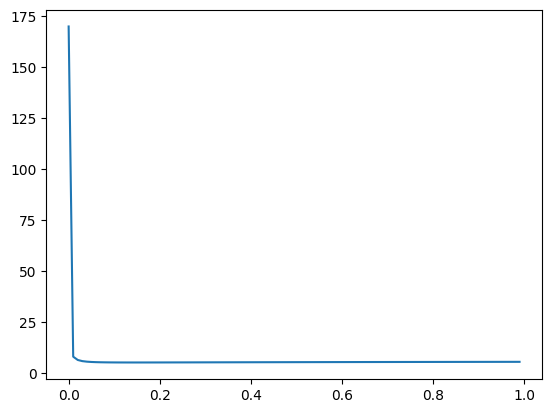

In [30]:
def solve(X, y, alpha):
    """
    @return: weights of the linear model
    """
    w = np.linalg.inv(X.T.dot(X) + alpha * np.identity(X.shape[0])).dot(X.T).dot(y)
    return w

if np.linalg.norm(solve(X, y, 0.1) - coef) < 10:
    print('success!')

alphas = list(np.arange(0., 1., 0.01))
data = []
for alpha in alphas:
    point = np.linalg.norm(solve(X, y, alpha) - coef)
    data.append(point)

plt.plot(alphas, data)
plt.show()

## Task 3 (20 points)
Implement Full Gradient Descent solution for linear MSE regression with $L_2$ regularization.  
Use gradient norm for stopping criterion.

In [26]:


def solve(X, y, alpha, max_iter, tol):
    """
    @param tol: value for stopping criterion
    @param max_iter: max number of iterations
    @return: weights of the linear model
    """
    coef = 0.01
    w = np.random.rand(len(y))
    for i in range(max_iter):
      delta = 2 / X.shape[0] * X.T.dot(X.dot(w) - y) + 2 * alpha * w
      w_new = w - coef * delta
      if np.linalg.norm(w_new - w) < tol:
        break
      w = w_new
    return w

if print(np.linalg.norm(solve(X, y, 0.99, 1000, 0.001) - coef) < 10):
    print('success!')

True


## Task 4 (20 points)
What param in `make_regression` affects condition number of $X^T X$ the most? Why?    
Tweak `make_regression` routine to generate problems with different condition numbers.  
Plot the dependence between $||\hat w - w||_2$ of the analytic solution from `task 1` and condition number of $X^T X$.  
Use log scale for condition numbers in the plot.

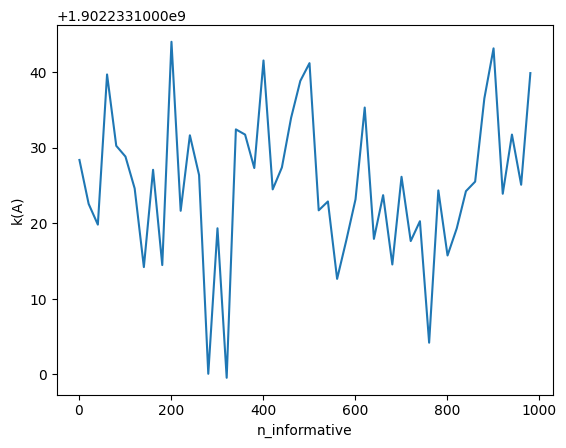

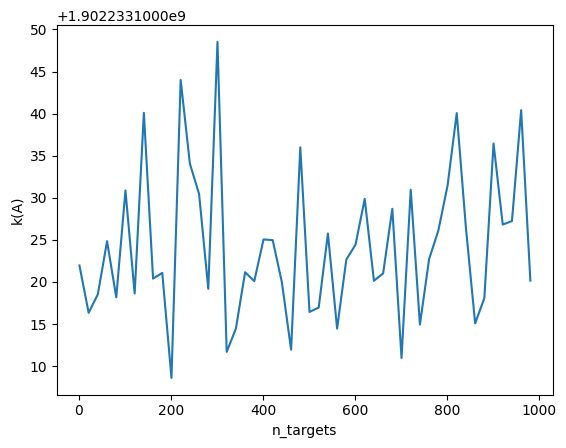

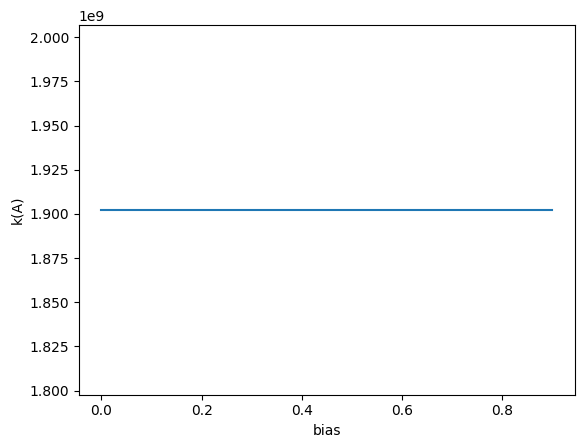

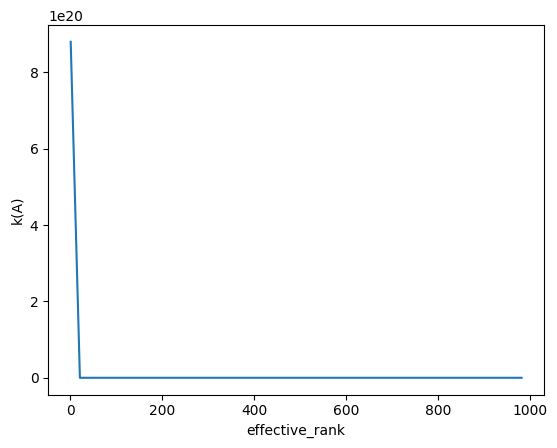

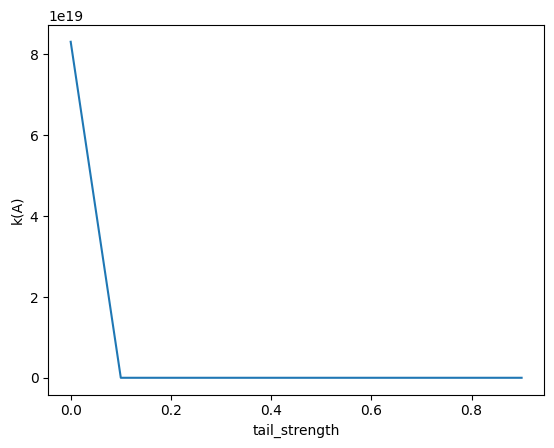

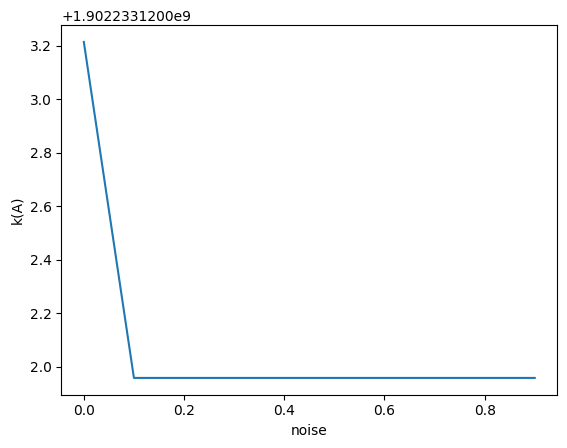

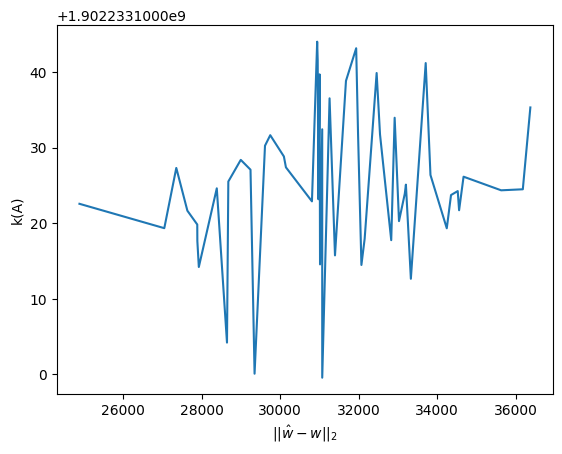

In [17]:
params = {
    "n_samples": 1000,
    "n_features": 1000,
    "n_informative": 1000,
    "n_targets": 1,
    "bias": 0.0,
    "effective_rank": 10,
    "tail_strength": 0.5,
    "noise": 0.1,
    "shuffle": True,
    "coef": True,
    "random_state": 42
}

def plot_ka(param_name, range):
    data = []
    range_list = list(range)
    params_copy = params.copy()
    for i in range_list:
        params_copy[param_name] = i
        X, y, coef = make_regression(**params_copy)
        point = np.linalg.cond(X.T.dot(X))
        data.append(point)

    plt.plot(range_list, data)
    plt.xlabel(param_name)
    plt.ylabel('k(A)')
    plt.show()

plot_ka('n_informative', range(1, 1000, 20))
plot_ka('n_targets', range(1, 1000, 20))
plot_ka('bias', np.arange(0.0, 1.0, 0.1))
plot_ka('effective_rank', range(1, 1000, 20))
plot_ka('tail_strength', np.arange(0.0, 1.0, 0.1))
plot_ka('noise', np.arange(0.0, 1.0, 0.1))

def solve(X, y):
    """
    @return: weights of the linear model
    """
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return w

data = []
n_infs = list(range(1, 1000, 20))
for i in n_infs:
    X, y, coef = make_regression(n_samples=1000,
                                 n_features=1000,
                                 n_informative=i,
                                 n_targets=1,
                                 bias=0.0,
                                 effective_rank=10,
                                 tail_strength=0.5,
                                 noise=0.1,
                                 shuffle=True, coef=True, random_state=42)
    data.append((np.linalg.norm(solve(X, y) - coef), np.linalg.cond(X.T.dot(X))))

data.sort()
diffs, kas = list(zip(*data))
plt.plot(diffs, kas)
plt.xlabel('$||\hat w - w||_2$')
plt.ylabel('k(A)')
plt.show()


## Task 5 (20 points)
How does switching on and off the `StandardScaler` transformation affects quality of solutions in the tasks 1-3?  
How is it connected with $L_2$ norm?

In [5]:
X, y, coef = make_regression(n_samples=1000,
                             n_features=1000,
                             n_informative=1000,
                             n_targets=1,
                             bias=0.0,
                             effective_rank=10,
                             tail_strength=0.5,
                             noise=0.1,
                             shuffle=True, coef=True, random_state=42)

print('k(A)', np.linalg.cond(X.T.dot(X)))

scaler = StandardScaler()
X_wscaler = scaler.fit_transform(X)

coef_wscaler = scaler.inverse_transform(coef.reshape(1,-1))

def solve1(X, y):
    """
    @return: weights of the linear model
    """
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return w

def solve2(X, y, alpha):
    """
    @return: weights of the linear model
    """
    w = np.linalg.inv(X.T.dot(X) + alpha * np.identity(X.shape[0])).dot(X.T).dot(y)
    return w

def solve3(X, y, alpha, max_iter, tol):
    """
    @param tol: value for stopping criterion
    @param max_iter: max number of iterations
    @return: weights of the linear model
    """
    coef = 0.01
    w = np.random.rand(len(y))
    for i in range(max_iter):
      delta = 2 / X.shape[0] * X.T.dot(X.dot(w) - y) + 2 * alpha * w
      w_new = w - coef * delta
      if np.linalg.norm(w_new - w) < tol:
        break
      w = w_new
    return w

print("X with scaler")
print(np.linalg.norm(solve1(X_wscaler, y) - coef_wscaler))
print(np.linalg.norm(solve2(X_wscaler, y, 0.1) - coef_wscaler))
print(np.linalg.norm(solve3(X_wscaler, y, 0.99, 1000, 0.001) - coef_wscaler))
print()

print("X without scaler")
print(np.linalg.norm(solve1(X, y) - coef))
print(np.linalg.norm(solve2(X, y, 0.1) - coef))
print(np.linalg.norm(solve3(X, y, 0.99, 1000, 0.001) - coef))

k(A) 1902233121.9574306
X with scaler
169.83069872471847
5.392965964196067
7.2311949648121105

X without scaler
32327.52169488466
1749.1571883389918
1845.387546887178
